In [ ]:
#Nomenclatura y definiciones 
# MM - Mando Medio =supervisores de rutas
# ReglaNegocio = Cantidad de visitas a clientes o acompañamiento a ruta que se deben realizar como base al mes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ModeloVisita:
    """Clase que representa a un modelo de visita"""
    
    key = "routeSchedule"  # Clientes/Rutas = [routeSchedule] | MandoMedio = [employee] 
    mes = "Agosto"
    reglaNegocio = 8
    tipoVisita   = 4   #   4.-Acompañamiento ruta | 35.-Visita  a cliente
    tipoAnalisis = 1   #   1.- valorAnalizado < reglaNegocio |  valorAnalizado >= reglaNegocio 
                       #   2.- valorAnalizado(MM) < reglaNegocio | valorAnalizado(MM) >= reglaNegocio
    
    
    #Constructor
    #def __init__ (self, key, mes, reglaNegocio , tipoVisita, tipoAnalisis):
    #def __init__ (self):
        #self.key = key
        #self.mes = mes 
        #self.reglaNegocio = reglaNegocio
        #self.tipoVisita = tipoVisita
        #self.tipoAnalisis = tipoAnalisis
        
    
    #checar si podemos dejar la ruta en c:
    def cargarArchivo(self):
        return pd.read_csv("C:\\Users\\mespinosa\\Documents\\pythonFundamental\\schedules" + str(self.tipoVisita) + self.mes + ".csv")
    
    
    def analizar(self, data):
        #Menos visitas
        
        dataGraficaBarrasMenor = data[data["idSchedul"] < int(self.reglaNegocio) ]
    
        #Mayor o igual a las visitas
        
        dataGraficaBarrasMayor = data[data["idSchedul"] >= int(self.reglaNegocio) ]
        
        
    #***************Imprimir la grafica*************************    
        if dataGraficaBarrasMayor.shape[0] > 0:  #si el dataframe tiene rows 
            #data.set_index('routeSchedule',inplace=True)
            print("Rutas que Cumplieron la regla de negocio")
            print(dataGraficaBarrasMayor)
            dataGraficaBarrasMayor.to_csv('Cumplieron'+str(self.tipoVisita) + str(self.mes) + str(self.tipoAnalisis) '.csv', header = True,index = True)
            dataGraficaBarrasMayor["idSchedul"].plot(kind='bar')
            plt.show()
            #plt.plot(data["idSchedul"])
            
            
            #Grafica de pie con porcentajes
            totalRutas = data.shape[0]  #Total de rutas/clientes analizados

            #Cumplen con el criterio
            Cumplieron = dataGraficaBarrasMayor.shape[0] #Cantidad de rutas que cumplieron en el paso anterior
            
            #No cumplen
            No_cumplieron = totalRutas - Cumplieron
            
            
            
            diccionario = {
                            "Titulos":["Cumplieron","No_cumplieron"],
                            "Totales" : [Cumplieron,No_cumplieron]
            }
            
            datosPie= pd.DataFrame(diccionario)
            print("Porcentaje de rutas")
            datosPie["Totales"].plot.pie(figsize=(10,10) ,labels=["Cumplieron","No_cumplieron"],autopct="%0.5f" )
            plt.show()
            
        else:
            print("No se encontraron datos para analizar")
        
        if dataGraficaBarrasMenor.shape[0] > 0:
            print("Fragmento de rutas que no cumplieron la regla de negocio")
            print(dataGraficaBarrasMenor)
            dataFiltrado = dataGraficaBarrasMenor.sort_values(by='idSchedul').head()
            dataFiltrado["idSchedul"].plot(kind='bar')
            plt.show()
            dataGraficaBarrasMenor.to_csv('noCumplieron'+str(self.tipoVisita) + str(self.mes) + str(self.tipoAnalisis) +'.csv', header = True,index = True)
            

In [15]:
#Funciones para carga de menu

def cargarMenu():
        opcion = int(input("""Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir\n """))
        
        #Falta validacion de opcion incorrecta aqui
        if opcion != 0:
            mes = input("Ingrese el mes a analizar")
            regla = int(input("Ingrese la regla de negocio\n"))
            return opcion, mes, regla
        
        return opcion,"",""


def subMenu():
# hay que hacer una validacion para opcion invalida    
    
    print("Seleccione la opcion a analizar")
    return int(input("""1.- Rutas/clientes
2.- Mando Medio\n"""))

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 4
Ingrese el mes a analizarAgosto
Ingrese la regla de negocio
10
Seleccione la opcion a analizar
1.- Rutas/clientes
2.- Mando Medio
1
tipoAnalisis 1
mes Agosto
reglaNegocio 10
tipoVisita 4
key routeSchedule
Rutas que Cumplieron la regla de negocio
               idSchedul
routeSchedule           
402686                16
404313                10
407700                10
406914                10


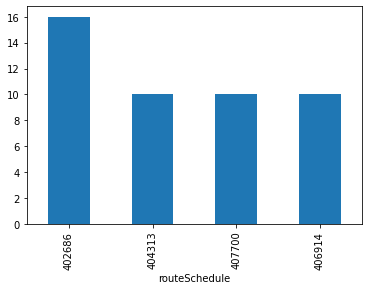

Porcentaje de rutas


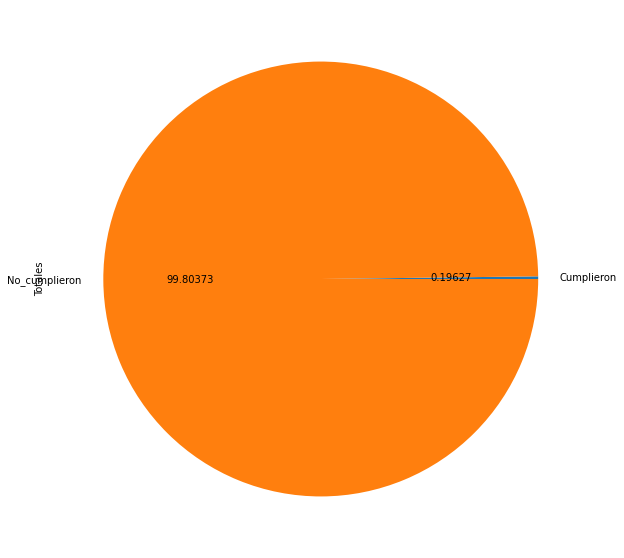

Fragmento de rutas que no cumplieron la regla de negocio
               idSchedul
routeSchedule           
405910                 9
406139                 9
405015                 9
415031                 8
415007                 8
...                  ...
403431                 1
403332                 1
403331                 1
408487                 1
400002                 1

[2034 rows x 1 columns]


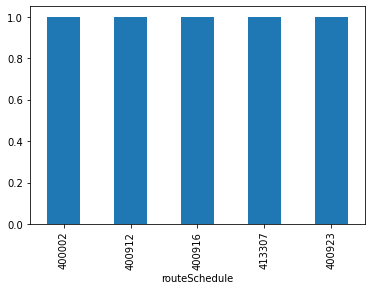

In [ ]:
#**********************************************************************************************
#****************************Logica del programa principal*************************************
#**********************************************************************************************
Salir=""

while(Salir!=0):
    
    #creamos una nueva instancia de la clase para iniciar el analisis
    ModeloV = ModeloVisita()
    
    #seleccionamos las opciones a analizar
    optionSelected, mesSelected, regla = cargarMenu()
    
    if optionSelected == 0:
        Salir=0
        break
    
    elif optionSelected != 4 and optionSelected != 35:
        print("Opcion incorrecta, por favor verifique!")
    
    else:
        #Iniciamos flujo de analisis normal
    
        #Seleccionamos el tipo de analisis
        ModeloV.tipoAnalisis = subMenu()

        #Completamos el resto de parametros de la clase
        ModeloV.mes = mesSelected
        ModeloV.reglaNegocio = regla
        ModeloV.tipoVisita = optionSelected
        
        print("tipoAnalisis",ModeloV.tipoAnalisis )
        print("mes",ModeloV.mes )
        print("reglaNegocio",ModeloV.reglaNegocio )
        print("tipoVisita",ModeloV.tipoVisita )
        print("key",ModeloV.key )

        #Cargamos el archivo con los datos
        datos = ModeloV.cargarArchivo()

        if ModeloV.tipoAnalisis < 2 : #Analisis de visita por ruta/cliente (tipoAnalisis 1)
            if ModeloV.tipoVisita == 4:
                ModeloV.key = "routeSchedule"
            else:
                ModeloV.key = "customer"
        else:
            ModeloV.key = "employee"
            
        datosEspecificos = datos[[ModeloV.key, "idSchedul",]]

        datosFinales = datosEspecificos.groupby([ModeloV.key],as_index=True).count().sort_values(by='idSchedul',ascending=False)
            
        #Analisis final
        ModeloV.analizar(datosFinales)